 # LINEAR REGRESSION WITH PYSPARK ML VS BIGQUERY ML

## 1. OBJECTIVE

This project aims at exploring the differences in speed and accuracy between a linear regression model built on the 'chicago_taxi_trips' dataset available in Google BigQuery as a publicly available dataset. Basic Linear Regression with BigQuery ML will be performed and compared with Linear Regression with Pyspark ML with different number of nodes to determine how close in speed Pyspark ML can get to BigQuery ML and possibly how many worker nodes are needed for this speedup.

Linear Regression in particular has been chosen as the algorithm for this project as BigQuery ML is still in its Beta phase and as of now only supports Linear Regression and Logistic Regression.

### 1.1 Why is this project of interest?
This project aims to accomplish the following along with fulfilling the objective:
- It explores a relatively traditional way as well as a new way of performing machine learning as well as gives a taste of what BigQuery is capable of. 
- It aims to explore one of the biggest reasons to use big data technologies: speed. 

## 2. ABOUT THE DATASET

The chicago_taxi_trips dataset can be found at : `https://console.cloud.google.com/bigquery?_ga=2.237940288.-1586404566.1547810022&project=sunayani&folder&organizationId&p=bigquery-public-data&d=chicago_taxi_trips&t=taxi_trips&page=table` [25]

The chicago_taxi_trips dataset is a publicly available dataset available in Google BigQuery. It contains information about taxi cab rides in the city of Chicago. The purpose of this project is to perform linear regression to predict the total trip cost using the other variables as predictors. 

The chicago_taxi_trips dataset consists of 23 fields and a total of 112,860,054 rows and the size of the dataset is 40.43 GB. The 23 fields of the dataset are described below:

1. `unique_key`            :  STRING     : uniquely identifies each row (trip)
2. `taxi_id`               :  STRING     : uniquely identifies each taxi
3. `trip_start_timestamp`  :  TIMESTAMP  : Trip start time; rounded to the nearest 15 mins
4. `trip_end_timestamp`    :  TIMESTAMP  : Trip end time; rounded to the nearest 15 mins
5. `trip_seconds`          :  INTEGER    : Total trip time in seconds
6. `trip_miles`            :  FLOAT      : Trip distance in miles
7. `pickup_census_tract`   :  INTEGER    : Census tract of area where trip started. Some values missing for privacy reasons
8. `dropoff_census_tract`  :  INTEGER    : Census tract of area where trip ended. Some values missing for privacy reasons
9. `pickup_community_area` :  INTEGER    : Community area where the trip began
10. `dropoff_community_area`:  INTEGER    : Community area where trip ended
11. `fare`                  :  FLOAT      : Total basic fare of the trip
12. `tips`                  :  FLOAT      : Total amount of tip
13. `tolls`                 :  FLOAT      : Total toll (if any) paid
14. `extras`                :  FLOAT      : Any other kind of extra charge paid during the trip
15. `trip_total`            :  FLOAT      : Total payment for the trip; includes fare, tips, tolls and extras. This is the variable of interest that is going to be predicted using the Linear Regression Models
16. `payment_type`          :  STRING     : Type of payment for the trip
17. `company`               :  STRING     : The taxi company
18. `pickup_latitdude`      :  FLOAT      : The latitude coordinate of the pickup_census_area (if applicable)
19. `pickup_longitude`      :  FLOAT      : The longitude coordinate of the pickup_census_area (if applicable)
20. `pickup_location`       :  STRING     : The coordinates of the pickup_census_area (if applicable)
21. `dropoff_latitdude`     :  FLOAT      : The latitude coordinate of the dropoff_census_area (if applicable)
22. `dropoff_longitude`     :  FLOAT      : The longitude coordinate of the dropoff_census_area (if applicable)
23. `dropoff_location`      :  STRING     : The coordinates of the dropoff_census_area (if applicable)

At the end, after data exploration and cleaning, the dataset that is used for linear regression is about 5.04 GB. This warrants the use of big data methods as the algorithm is quite slow, learns on a large dataset and needs speeding up. The project shows how to add nodes to the cluster to speed up the process of performing machine learning in pyspark. 

## 3. Introduction to BigQuery and BigQuery ML

Google BigQuery is a data warehouse which can store massive quantities of data. It allows users to query the data and perform analytics tasks on read-only big data. Data on Google BigQuery can easily be queried using simple SQL queries using the processing power of Google's infrastructure[1]. BigQuery can run queries on billions of rows of data in a matter of seconds. 

Google BigQuery runs on top of Dremel i.e, it is an implementation of Google's core technologies code named 'Dremel'[2]. Dremel is Google's software for running extremely fast SQL queries on large quantities of data. The basic difference between Dremel and BigQuery is that Dremel is used by the engineers, technicians, analysts etc working at Google whereas BigQuery is a public implementation of the Dremel technology meaning it is an externalisation of Dremel that is available to the public. So, the public can harness the capabilities of Dremel using BigQuery for their big data processing requirements. 

Google BigQuery's Public Datasets Program houses many publicly available datasets. The dataset being used in this project is one of these datasets. BigQuery has a perpetual free tier and allows 10 GB free storage and 1 TB data querying per month. 

In 2018, Google announced a new feature of Google BigQuery called Google BigQuery ML. It allows users to perform Machine Learning in the BigQuery architecture itself so this means that the response time is very quick as is demonstrated in this project. As of now, BigQuery ML is still in its development Beta phase meaning that currently only Linear Regression and Logistic Regression are supported. However, BigQuery ML will go a long way to helping everyone (analysts, technicians) get into the field of Machine Learning since it uses simple SQL queries to build machine learning models and similar SQL queries for prediction and model evaluation. With BigQuery ML, the user need not have in-depth knowledge of Machine Learning in order to be able to leverage the power of machine learning in their analytics tasks. Anyone with knowlegdge of SQL can easily use BigQuery ML.[3]

## 4. BASIC INFORMATION ABOUT TAXICAB PRICING

Taxi cab services price their services according to various different parameters:
- Distance travelled
- Time of the day (Rush hours are priced higher due to higher demand. This is also called surge pricing)
- Area of travel (Cab services exploit people's power to spend and charge more in areas that are more affluent) [4] 
- Any extra charges are added to the final cost of the ride (including waiting time, toll, tips and other extra costs)

Using some domain knowledge (procured using some research), the parameters that are most important for predicting the price of the cab rides are selected.

## 5. PROJECT APPROACH

The Google BigQuery Connector for Apache Spark is used to read/write data from BigQuery[5]. This project first loads the data from BigQuery using the BigQuery Connector. Then, some basic data cleaning is performed in order to get the data into a suitable format for performing linear regression on it. Once this cleaned data is procured, linear regression in pyspark is performed four times - each time using different number of worker nodes. The time requirements of each are recorded. Also, the accuracy of the model is recorded.

The data used to perform linear regression in pyspark is then loaded into BigQuery using the BigQuery Connector to perform BigQuery ML on it. The time required by BigQuery ML to perform linear regression on this data is recorded. The accuracy of this model is also recorded. 

Finally, the different results of linear regression in pyspark is compared with the result of linear regression using BigQuery ML.



## 6. IMPLEMENTATION

The following portion implements the project. Before running the following blocks of code, it is important to:
- Create a bucket : `gsutil mb gs://sunz-bucket`
- Initilise a dataproc cluster; add initialisation actions for the BigQuery connector : 
`gcloud dataproc clusters create sunz-cluster --bucket sunz-bucket --subnet default --zone europe-west3-a --master-machine-type n1-standard-4 --master-boot-disk-size 500 --num-workers 2 --worker-machine-type n1-standard-4 --worker-boot-disk-size 500 --image-version 1.3-deb9 --project sunayani --initialization-actions "gs://dataproc-initialization-actions/jupyter/jupyter.sh", "gs://dataproc-initialization-actions/connectors/connectors.sh" --metadata "gcs-connector-version=1.7.0" --metadata "bigquery-connector-version=0.11.0"`
- Set up an SSH channel : `gcloud compute ssh sunz-cluster-m --project=sunayani --zone=europe-west3-a -- -D 1080 -N`

- Navigate to google chrome
- Configure the browser to run the jupyter notebook on it `chrome.exe --proxy-server="socks5://localhost:1080" --user-data-dir="%Temp%\sunz-cluster-m" http://sunz-cluster-m:8088`

- In the newly opened browser window, access port 8123 for the jupyter notebook like so : `http://sunz-cluster-m:8123`
- Make sure that the Kernel is Pyspark

### 6.1 LOADING THE DATA FROM BIGQUERY[6]
The following blocks of code facilitate loading of the chicago_taxi_trips dataset from the public datasets available in Google BigQuery. 

In [1]:
## install google-cloud-bigquery to be able to import bigquery from google.cloud
!pip install --upgrade google-cloud-bigquery

Requirement already up-to-date: google-cloud-bigquery in /opt/conda/lib/python3.6/site-packages (1.11.2)


In [2]:
## import bigquery
from google.cloud import bigquery

In [3]:
## The BigQuery client using the default GCP project details
client = bigquery.Client()

In [4]:
## Create a reference to a new BigQuery dataset
dataset_ref = client.dataset('chicago_taxi_trips')
dataset = bigquery.Dataset(dataset_ref)

In [5]:
## New BigQuery Dataset
dataset = client.create_dataset(dataset)

In [6]:
## In the newly created dataset, set up a reference to a table which will contain the query results
table_ref = dataset.table('Input_table')

In [7]:
## Configure the query job
job_config = bigquery.QueryJobConfig()

In [8]:
## Set the destination of the query job as the table reference created above
job_config.destination = table_ref

#### It should be noted that the following query does not consider null values for some parameters. At first glance, existence of null values at those places seem problematic (Before performing any sort of data exploration, the following variables seem to be most important to predict the total cost of the taxi ride. Other variables such as fare, tips, tolls and extras have also been included in this category of variables even though these will not be used to predict the total fare).

In [9]:
## Query the chicago_taxi_trips dataset in SQL. This is the default for the BigQuery Python client library 
query = """
    SELECT
        *
    FROM
        `bigquery-public-data.chicago_taxi_trips.taxi_trips`
    WHERE
        trip_start_timestamp IS NOT NULL
        AND trip_seconds IS NOT NULL
        AND trip_miles IS NOT NULL
        AND pickup_community_area IS NOT NULL
        AND dropoff_community_area IS NOT NULL
        AND fare IS NOT NULL
        AND tips IS NOT NULL
        AND tolls IS NOT NULL
        AND extras IS NOT NULL
        AND trip_total IS NOT NULL
        AND payment_type IS NOT NULL
        AND company IS NOT NULL
"""

After removing some null values, the size of the dataset is 23.42 GB.

In [10]:
## Run the query 
query_job = client.query(query, job_config=job_config)

In [11]:
## Wait for the query to finish
query_job.result()

In [12]:
## Import various libraries: datetime for timing purposes
## SparkContext - gateway for a spark cluster
## SparkSession - start the spark session
from datetime import datetime
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

In [13]:
## The following block of code uses cloud dataproc configurations to get the bucket and the project id 
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)
bucket = spark._jsc.hadoopConfiguration().get("fs.gs.system.bucket")
project = spark._jsc.hadoopConfiguration().get("fs.gs.project.id")

In [14]:
## Create a new directory in the bucket. This is path from where the data transfer from BigQuery will take place
todays_date = datetime.strftime(datetime.today(), "%Y-%m-%d-%H-%M-%S")
input_directory = "gs://{}/tmp/chicago_taxi-{}".format(bucket, todays_date)

In [15]:
## The input parameters for the configuration which is an argument for reading in data from BigQuery
conf = {
    # Input Parameters
    "mapred.bq.project.id": project,
    "mapred.bq.gcs.bucket": bucket,
    "mapred.bq.temp.gcs.path": input_directory,
    "mapred.bq.input.project.id": project,
    "mapred.bq.input.dataset.id": "chicago_taxi_trips",
    "mapred.bq.input.table.id": "Input_table",
}

In [16]:
## Read in data from BigQuery to pyspark using newAPIHadoopRDD. Data is read as an RDD
table_data = spark.sparkContext.newAPIHadoopRDD(
    "com.google.cloud.hadoop.io.bigquery.JsonTextBigQueryInputFormat",
    "org.apache.hadoop.io.LongWritable",
    "com.google.gson.JsonObject",
    conf=conf)

In [17]:
## Extract the JSON strings from the RDD
table_json = table_data.map(lambda x: x[1])

In [18]:
## Convert the RDD to a pyspark dataframe
chicago_taxi_data = spark.read.json(table_json)

In [19]:
## View schema of the data
chicago_taxi_data.printSchema()

root
 |-- company: string (nullable = true)
 |-- dropoff_census_tract: string (nullable = true)
 |-- dropoff_community_area: string (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- dropoff_location: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- extras: long (nullable = true)
 |-- fare: long (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- pickup_census_tract: string (nullable = true)
 |-- pickup_community_area: string (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- taxi_id: string (nullable = true)
 |-- tips: long (nullable = true)
 |-- tolls: long (nullable = true)
 |-- trip_end_timestamp: string (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_seconds: string (nullable = true)
 |-- trip_start_timestamp: string (nullable = true)
 |-- trip_total: long (nullable = true)
 |-- uniq

In [20]:
## Check out the top few rows of the data
chicago_taxi_data.show(10, False)

+---------------------------------+--------------------+----------------------+----------------+------------------------------------+-----------------+------+----+------------+-------------------+---------------------+---------------+-----------------------------------+----------------+--------------------------------------------------------------------------------------------------------------------------------+----+-----+-----------------------+----------+------------+-----------------------+----------+----------------------------------------+
|company                          |dropoff_census_tract|dropoff_community_area|dropoff_latitude|dropoff_location                    |dropoff_longitude|extras|fare|payment_type|pickup_census_tract|pickup_community_area|pickup_latitude|pickup_location                    |pickup_longitude|taxi_id                                                                                                                         |tips|tolls|trip_end_timestamp   

In [21]:
## Create a table name which can be used when quering the data
chicago_taxi_data.createOrReplaceTempView("Chicago_Taxi_Trips")

In [22]:
## The number of rows in the dataset
chicago_taxi_data.count()

60535858

### 6.2 DATA EXPLORATION AND DATA CLEANING

In [23]:
from pyspark.sql.functions import *

In [24]:
## Check out the top few rows of the dataset using spark.sql() 
spark.sql("Select * from Chicago_Taxi_Trips").show(10, False)

+---------------------------------+--------------------+----------------------+----------------+------------------------------------+-----------------+------+----+------------+-------------------+---------------------+---------------+-----------------------------------+----------------+--------------------------------------------------------------------------------------------------------------------------------+----+-----+-----------------------+----------+------------+-----------------------+----------+----------------------------------------+
|company                          |dropoff_census_tract|dropoff_community_area|dropoff_latitude|dropoff_location                    |dropoff_longitude|extras|fare|payment_type|pickup_census_tract|pickup_community_area|pickup_latitude|pickup_location                    |pickup_longitude|taxi_id                                                                                                                         |tips|tolls|trip_end_timestamp   

In [25]:
## It seems like dropoff_location is just a combination of dropoff_latitude and dropoff_longitude. So, dropoff_location can 
## be ignored as we do not lose any information. The same goes for pickup_latitude, pickup_longitude and pickup_location
spark.sql("Select dropoff_latitude, dropoff_longitude, dropoff_location from Chicago_Taxi_Trips").show(10, False)

+----------------+-----------------+------------------------------------+
|dropoff_latitude|dropoff_longitude|dropoff_location                    |
+----------------+-----------------+------------------------------------+
|41.936159071    |-87.661265218    |POINT (-87.6612652184 41.936159071) |
|41.938391258    |-87.63857492     |POINT (-87.6385749205 41.9383912577)|
|42.001698194    |-87.673574032    |POINT (-87.6735740325 42.0016981937)|
|41.914747305    |-87.654007029    |POINT (-87.6540070286 41.9147473049)|
|41.850266366    |-87.667569312    |POINT (-87.667569312 41.8502663663) |
|41.950673358    |-87.666536281    |POINT (-87.6665362813 41.9506733576)|
|41.921877461    |-87.66407824     |POINT (-87.6640782395 41.9218774613)|
|41.946489764    |-87.647113634    |POINT (-87.647113634 41.946489764)  |
|41.921778188    |-87.651061884    |POINT (-87.6510618838 41.9217781876)|
|41.794090253    |-87.592310855    |POINT (-87.592310855 41.794090253)  |
+----------------+-----------------+--

In [26]:
## Select those columns that seem important from a regression perspective
chicago_taxi_data = spark.sql("Select trip_start_timestamp, \
trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, \
trip_total, payment_type, company from Chicago_Taxi_Trips")

In [27]:
## Create a table with the dataset created in order to run SQL queries on it
chicago_taxi_data.createOrReplaceTempView("Chicago_Taxi_Trips")

#### Why have some variables not been considered? 
- `unique_key` : This field just identifies the unique entries in the field and will not help the linear regression model's predictions.
- `taxi_id` : This field identifies the individual taxis. It makes more sense to build a model based on trends of different companies rather than the different taxis they own. One thing that this overlooks is the fact that every company has various classes of taxis that they offer and each type of cab has its own charges. In this case, since we are not provided the details of the cab type and only the taxi id's, the prediction will be made according to the company and not the taxi.
- `trip_end_timetstamp` : Since we are considering the hour at which the ride is taking place and we also have a field which
describes how much time each cab ride lasts, this column can be done away with.
- `pickup_census_tract` and `dropoff_census_tract` : This information is missing in a few rows due to privacy reasons. Also, since we are considering the community areas of the cab rides, these columns are not required.
- `fare`, `tips`, `tolls`, `extras` : These have been left out to prevent any chance of spurious regression. Since simply the sum of all these variables gives the trip_total, using these variables to predict the trip_total is meaningless. 
- `pickup_latitude`, `pickup_longitude`, `dropoff_latitude` and `dropoff_longitude` : Since we are considering the pickup and dropoff community areas in our analysis, there is no need to include these columns.

#### The following few blocks of code split the trip_start_timestamp in order to extract the trip start hour i.e, the hour at which the trip started

In [28]:
## Split the trip_start_timestamp column by spaces
chicago_taxi_data = chicago_taxi_data.withColumn("trip_start_timestamp", split("trip_start_timestamp", " "))

In [29]:
## View the resulting dataset. Under the trip_start_timestamp column, we have a list of the date, time and timezone
chicago_taxi_data.show(10, False)

+---------------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|trip_start_timestamp       |trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|trip_total|payment_type|company                          |
+---------------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|[2014-05-10, 02:30:00, UTC]|60          |1.9       |6                    |6                     |1005      |Credit Card |Taxi Affiliation Services        |
|[2014-07-05, 01:15:00, UTC]|900         |0.2       |24                   |6                     |1485      |Credit Card |Blue Ribbon Taxi Association Inc.|
|[2014-12-01, 15:15:00, UTC]|840         |0.2       |3                    |1                     |1470      |Credit Card |Taxi Affiliation Services        |
|[2015-10-26, 18:00:00, UTC]|1020        |0.1       |8    

In [30]:
## Extract only the time
chicago_taxi_data = chicago_taxi_data.withColumn('trip_start_timestamp', chicago_taxi_data["trip_start_timestamp"][1])

In [31]:
## View the resulting dataset
chicago_taxi_data.show(10, False)

+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|trip_start_timestamp|trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|trip_total|payment_type|company                          |
+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|02:30:00            |60          |1.9       |6                    |6                     |1005      |Credit Card |Taxi Affiliation Services        |
|01:15:00            |900         |0.2       |24                   |6                     |1485      |Credit Card |Blue Ribbon Taxi Association Inc.|
|15:15:00            |840         |0.2       |3                    |1                     |1470      |Credit Card |Taxi Affiliation Services        |
|18:00:00            |1020        |0.1       |8                    |7                     |1165     

In [32]:
## Split the trip_start_timestamp column by :
chicago_taxi_data = chicago_taxi_data.withColumn("trip_start_timestamp", split("trip_start_timestamp", ":"))

In [33]:
## View the resulting dataset. Under the trip_start_timestamp column, we have a list of the hour, minute and the seconds 
chicago_taxi_data.show(10, False)

+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|trip_start_timestamp|trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|trip_total|payment_type|company                          |
+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|[02, 30, 00]        |60          |1.9       |6                    |6                     |1005      |Credit Card |Taxi Affiliation Services        |
|[01, 15, 00]        |900         |0.2       |24                   |6                     |1485      |Credit Card |Blue Ribbon Taxi Association Inc.|
|[15, 15, 00]        |840         |0.2       |3                    |1                     |1470      |Credit Card |Taxi Affiliation Services        |
|[18, 00, 00]        |1020        |0.1       |8                    |7                     |1165     

In [34]:
## Extract the hour
chicago_taxi_data = chicago_taxi_data.withColumn("trip_start_timestamp", chicago_taxi_data['trip_start_timestamp'][0])

In [35]:
## View the resulting dataset. Finally, the trip_start_timestamp contains the hour at which the trip started
chicago_taxi_data.show(10, False)

+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|trip_start_timestamp|trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|trip_total|payment_type|company                          |
+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|02                  |60          |1.9       |6                    |6                     |1005      |Credit Card |Taxi Affiliation Services        |
|01                  |900         |0.2       |24                   |6                     |1485      |Credit Card |Blue Ribbon Taxi Association Inc.|
|15                  |840         |0.2       |3                    |1                     |1470      |Credit Card |Taxi Affiliation Services        |
|18                  |1020        |0.1       |8                    |7                     |1165     

In [36]:
## Create a table with the dataset created in order to run SQL queries on it
chicago_taxi_data.createOrReplaceTempView("Chicago_Taxi_Trips")

In [37]:
## The variable trip_start_timestamp is cast as an integer in order to make it easy to split the trips into different
## time slots (done later). Similarly, the variables pickup_community_area and dropoff_community_area 
## as cast as integer in order to make it easy to group them into different area zones (done later)

chicago_taxi_data2 = spark.sql("Select CAST(trip_start_timestamp as INT), \
CAST(trip_seconds as DOUBLE), trip_miles, CAST(pickup_community_area as INT), CAST(dropoff_community_area as INT),\
trip_total, payment_type, company from Chicago_Taxi_Trips")

In [38]:
## View schema of the new dataframe
chicago_taxi_data2.printSchema()

root
 |-- trip_start_timestamp: integer (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- trip_total: long (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



In [39]:
## View the new dataframe
chicago_taxi_data2.show(10, False)

+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|trip_start_timestamp|trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|trip_total|payment_type|company                          |
+--------------------+------------+----------+---------------------+----------------------+----------+------------+---------------------------------+
|2                   |60.0        |1.9       |6                    |6                     |1005      |Credit Card |Taxi Affiliation Services        |
|1                   |900.0       |0.2       |24                   |6                     |1485      |Credit Card |Blue Ribbon Taxi Association Inc.|
|15                  |840.0       |0.2       |3                    |1                     |1470      |Credit Card |Taxi Affiliation Services        |
|18                  |1020.0      |0.1       |8                    |7                     |1165     

In [40]:
## Create a table with the dataset created in order to run SQL queries on it
chicago_taxi_data2.createOrReplaceTempView("Chicago_Taxi_Trips")

The following cells will place the pickup hour into 4 different buckets according to the hour:
- Between 6-9AM - Morning Rush Hour
- Between 9AM-4PM - Morning Time
- Between 4-7PM - Evening Rush Hour
- Between 7PM-6AM - Night Time

All times given are in UTC so a convenient conversion here is to just add 5 hrs to UTC to get the hours mentioned above in CDT (Central Daylight time) which is the timezone that Chicago lies in.



In [41]:
## Query to perform the above-mentioned transformation.
## NOTE: trip_total is renamed label as this is the default name of the variable to be predicted in linear
## regression in pyspark

chicago_taxi_data2 = spark.sql("Select CASE WHEN (trip_start_timestamp > 11 AND trip_start_timestamp <= 14) THEN 'Morning Rush' \
WHEN (trip_start_timestamp > 14 AND trip_start_timestamp <= 21) THEN 'Morning Time' \
WHEN (trip_start_timestamp > 21 OR trip_start_timestamp == 00) THEN 'Evening Rush' \
WHEN (trip_start_timestamp > 00 AND trip_start_timestamp <= 11) THEN 'Night Time' \
END as time_of_day, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area,\
trip_total as label, payment_type, company from Chicago_Taxi_Trips")

In [42]:
## View schema of the new dataset
chicago_taxi_data2.printSchema()

root
 |-- time_of_day: string (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: integer (nullable = true)
 |-- dropoff_community_area: integer (nullable = true)
 |-- label: long (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



In [43]:
## View the new dataset
chicago_taxi_data2.show(10, False)

+------------+------------+----------+---------------------+----------------------+-----+------------+---------------------------------+
|time_of_day |trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|label|payment_type|company                          |
+------------+------------+----------+---------------------+----------------------+-----+------------+---------------------------------+
|Night Time  |60.0        |1.9       |6                    |6                     |1005 |Credit Card |Taxi Affiliation Services        |
|Night Time  |900.0       |0.2       |24                   |6                     |1485 |Credit Card |Blue Ribbon Taxi Association Inc.|
|Morning Time|840.0       |0.2       |3                    |1                     |1470 |Credit Card |Taxi Affiliation Services        |
|Morning Time|1020.0      |0.1       |8                    |7                     |1165 |Credit Card |Taxi Affiliation Services        |
|Morning Time|420.0       |1.5       |31 

In [44]:
## Create a table with the dataset created in order to run SQL queries on it
chicago_taxi_data2.createOrReplaceTempView("Chicago_Taxi_Trips2")

The following query transforms the pickup community area and the dropoff community area according to the community area the taxi ride is taking place in. Doing a quick search in wikipedia about this[7], there are 4 main community areas in the city of Chicago: Central side, North side, West side and South side. Taxi cab companies use what is known as 'route based pricing' which is based on 'willingness to pay'. In other words, this means that the cab companies use localities to determine how much money people travelling in and around the locality can pay and use this information to set prices for different localities. People travelling in and around posh localities are more likely to be rich and will be more willing to pay higher prices than those who travel in and around poorer localities. 

For the purpose of this project, a simple interpretation of the above concept in the context of the data is as follows:
1. Central - The central community area is the hub of commercial activity. 
2. North - The north area is where most of the affluent families and middle class families live. 
3. South - The south side has the biggest attractions and parks in the city. 
4. West - This area has a history with socio-economic problems.

There are a total of 77 community areas in Chicago.

In [45]:
## Query to perform the above-mentioned transformation. 
## NOTE: The label column is cast as double as this is a requirement of the label column in linear regression
## in pyspark

chicago_taxi_data3 = spark.sql("Select time_of_day, trip_seconds, trip_miles, \
CASE WHEN (pickup_community_area IN (8, 32, 33)) THEN 'Central'\
WHEN (pickup_community_area IN (1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,76,77)) THEN 'North'\
WHEN (pickup_community_area >= 23 AND pickup_community_area<=31) THEN 'West'\
WHEN (pickup_community_area>=34 AND pickup_community_area<=75) THEN 'South'\
END as pickup_community_area,\
CASE WHEN (dropoff_community_area IN (8, 32, 33)) THEN 'Central'\
WHEN (dropoff_community_area IN (1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,76,77)) THEN 'North'\
WHEN (dropoff_community_area >= 23 AND dropoff_community_area<=31) THEN 'West'\
WHEN (dropoff_community_area >=34 AND dropoff_community_area<=75) THEN 'South'\
END as dropoff_community_area,\
CAST(label as DOUBLE), payment_type, company from Chicago_Taxi_Trips2")

In [46]:
## View schema of the newly created dataset
chicago_taxi_data3.printSchema()

root
 |-- time_of_day: string (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: string (nullable = true)
 |-- dropoff_community_area: string (nullable = true)
 |-- label: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



In [47]:
## View the newly created dataset
chicago_taxi_data3.show(10, False)

+------------+------------+----------+---------------------+----------------------+------+------------+---------------------------------+
|time_of_day |trip_seconds|trip_miles|pickup_community_area|dropoff_community_area|label |payment_type|company                          |
+------------+------------+----------+---------------------+----------------------+------+------------+---------------------------------+
|Night Time  |60.0        |1.9       |North                |North                 |1005.0|Credit Card |Taxi Affiliation Services        |
|Night Time  |900.0       |0.2       |West                 |North                 |1485.0|Credit Card |Blue Ribbon Taxi Association Inc.|
|Morning Time|840.0       |0.2       |North                |North                 |1470.0|Credit Card |Taxi Affiliation Services        |
|Morning Time|1020.0      |0.1       |Central              |North                 |1165.0|Credit Card |Taxi Affiliation Services        |
|Morning Time|420.0       |1.5    

In [48]:
## Create a table with the dataset created in order to run SQL queries on it
chicago_taxi_data3.createOrReplaceTempView("Chicago_Taxi_Trips3")

In [49]:
## View the schema of the dataset
chicago_taxi_data3.printSchema()

root
 |-- time_of_day: string (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- pickup_community_area: string (nullable = true)
 |-- dropoff_community_area: string (nullable = true)
 |-- label: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



For the purposes of this project, we will concatenate the pickup and dropoff community areas in order to be able to differentiate between different trip types based on areas travelled.

In [50]:
## Query to perform the above-mentioned transformation. 

chicago_taxi_data4 = spark.sql("Select time_of_day, trip_seconds, trip_miles,\
CONCAT(pickup_community_area,', ',dropoff_community_area) as area,\
label, payment_type, company from Chicago_Taxi_Trips3")

In [51]:
## View the dataset
chicago_taxi_data4.show(10,False)

+------------+------------+----------+--------------+------+------------+---------------------------------+
|time_of_day |trip_seconds|trip_miles|area          |label |payment_type|company                          |
+------------+------------+----------+--------------+------+------------+---------------------------------+
|Night Time  |60.0        |1.9       |North, North  |1005.0|Credit Card |Taxi Affiliation Services        |
|Night Time  |900.0       |0.2       |West, North   |1485.0|Credit Card |Blue Ribbon Taxi Association Inc.|
|Morning Time|840.0       |0.2       |North, North  |1470.0|Credit Card |Taxi Affiliation Services        |
|Morning Time|1020.0      |0.1       |Central, North|1165.0|Credit Card |Taxi Affiliation Services        |
|Morning Time|420.0       |1.5       |West, West    |645.0 |Cash        |Taxi Affiliation Services        |
|Night Time  |240.0       |0.0       |North, North  |565.0 |Cash        |Taxi Affiliation Services        |
|Evening Rush|420.0       |1

**This is the final dataset that will be the input for linear regression. The size of this dataset is 5.04 GB.**

In [52]:
## View the schema of the dataset
chicago_taxi_data4.printSchema()

root
 |-- time_of_day: string (nullable = true)
 |-- trip_seconds: double (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- area: string (nullable = true)
 |-- label: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- company: string (nullable = true)



Now that the data has been cleaned and brought down to a lower dimension, this dataset will be loaded into Google BigQuery to perform BigQuery ML on it. Side by side, Pyspark ML will also be performed on the same data. The performances of both approaches in terms of speed and accuracy will be determined and compared.

In [53]:
## Create a table with the dataset created in order to run SQL queries on it
chicago_taxi_data4.createOrReplaceTempView("Chicago_Taxi_Trips4")

### 6.3 Pearson Correlation Matrix[10]

Check the correlation matrix to see which explanatory variables are linked to the predictor. One should note that correlation does not imply causation but using domain knowledge, we can use this information to roughly guess which explanatory variables make sense and which do not.

In this case, some reseach was carried out to find out more about cab services and how they price their rides. All decisions on explanatory variables made in this notebook have been made with this in mind.

In [53]:
## Import various libraries that facilitate the calculation of the Correlation matrix
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation

In [209]:
## Create a list of all the features and select all of the features including the label in order 
## to prepare the data for calculating the Correlation Matrix
features = ["trip_seconds", "trip_miles"]
chicago_taxi_trips_corr_data = chicago_taxi_data3.select(col("label"), *features)

In [210]:
## VectorAssembler combines all columns inputted as a list into a single column. This column is a list of 
## all the values
vector = VectorAssembler(inputCols = chicago_taxi_trips_corr_data.columns, outputCol = "unscaled_features")

## StandardScaler takes in the list of features and outputs the list of scaled features
scaler = StandardScaler(inputCol = "unscaled_features", outputCol = "scaled_features")

## Stages for the pipeline
stages_for_pipeline = [vector,scaler]
        
## Create a pipeline 
pipeline = Pipeline(stages = stages_for_pipeline)

#### What is a pipeline?
A pipeline is a sequence of stages and each stage is a Transformer or an Estimator[8]
The pyspark.ml library at its core contains the two classes Tansformer and Estimator[9]. 

The **Transformer** class has .tranform() method which takes a dataframe and transforms it to another dataframe (usually the same dataframe but with a column added).

The **Estimator** class has a .fit() method which takes a dataframe and returns a 'model' object. This model could be for example, a machine learning model or an indexer.

In [211]:
## Apply the fit and transform methods on the dataset 
chicago_taxi_trips_corr_data_scaled = pipeline.fit(chicago_taxi_trips_corr_data).transform(chicago_taxi_trips_corr_data).select("scaled_features")

In [212]:
## View the scaled features 
chicago_taxi_trips_corr_data_scaled.show(10, False)

+------------------------------------------------------------+
|scaled_features                                             |
+------------------------------------------------------------+
|[0.3185416611850243,1.040912109697699,0.4831591754860263]   |
|[0.5707805331641159,1.040912109697699,0.0]                  |
|[0.23782522215171498,0.6939414064651326,0.24848186167852784]|
|[1.8175612432321975,1.7348535161628316,0.5383773669701436]  |
|[0.28971436153027097,1.214397461313982,0.013804547871029325]|
|[0.22629430228981365,0.9541694338895573,0.24848186167852784]|
|[0.4511472395968896,1.5613681645465483,0.0]                 |
|[1.2871389295847362,2.5155375984361057,0.1794591223233812]  |
|[0.19170154270410963,0.607198730656991,0.2346773138074985]  |
|[0.19170154270410963,0.6939414064651326,0.0]                |
+------------------------------------------------------------+
only showing top 10 rows



In [213]:
## Compute the correlation matrix 
corr_matrix = Correlation.corr(chicago_taxi_trips_corr_data_scaled, "scaled_features").head()

In [214]:
## Output the correlation matrix
print("Pearson Correlation matrix is ", str(corr_matrix[0]))

Pearson Correlation matrix is  DenseMatrix([[1.        , 0.27528411, 0.13050196],
             [0.27528411, 1.        , 0.31321592],
             [0.13050196, 0.31321592, 1.        ]])


#### Interpreting the Pearson Correlation Matrix
The Pearson Correlation Coefficients range from -1 to 1. The closer the value is to 1 or -1, the more the correlation. A value close to 0 indicates little to no correlation. From the Pearson Correlation matrix, we can tell that the all of the numerical variables have a positive correlation with the predictor. The correlation between trip_miles and trip_total seems quite low. However, the taxicab companies calculate the fares using distance as well as duration of travel along with a host of other variables. Thus, we will keep these variables in our model.

### 6.4 LINEAR REGRESSION
#### Some background about Linear Regression [11]
- Linear Regression algorithm models the linear relationship between a predictor (dependent) variable and one or more predictor (independent) variables.


- In Linear Regression, we want to find coefficients $\beta_1,..\beta_n$ and intercept $\beta_0$ such that $ y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$ such that the coefficients and the intercept corresponds to the hyperplane of best fit where $y$ is the response variable and $x_i$'s are the explanatory variables. 


- The model is usually fit using the Ordinary Least Squares (OLS) method. The OLS method aims at minimising the loss function $(y - \beta_0 - \sum_{i=1}^{n}\beta_ix_i)$ but this comes at the cost of overfitting the model. Overfitting means the model gets trained too closely to the data it learns from. 


- Regularisation is a technique to avoid overfitting. We can reduce overfitting by penalising the minimisation of the loss function using regularisation methods such as the ridge and lasso regression which use the L2 and L1 norms respectively. In this project, we are using the Ridge regression algorithm which uses the L2 norm to penalise the loss function. The form of the Ridge regression is : $(y - \beta_0 - \sum_{i=1}^{n}\beta_ix_i) - \lambda\sum_{i=1}^{p} \beta_i^2$.
Here, lambda is the shrinkage parameter which controls the amount of regularisation. 





### 6.4.1 LINEAR REGRESSION IN PYSPARK [12][13]

Calculation of the Pearson Correlation Matrix itself isn't a part of the Linear Regression with Pypark ML, so we will 
not add the time for this process in the calculation of the time requirements for Pyspark ML. 

In [69]:
## Library which facilitates the calculation of how much time goes into execution of any block of code
import datetime

#### Some Background about Linear Regression in Pyspark
In order to run a linear regression model in pyspark, a few changes need to be made to the data:
- **Numerical Variables** : The linear regression model that will be created here will have some interacting terms since it is a multivariate model. The numerical variables need to be standardised in order to reduce multicollinearity betweeen the interacting terms. If standarisation is not carried out, we risk missing statistically significant results as well as stand the risk of producing misleading results[14].

- **Categorical Variables** : There is a need to convert the categorical variables into numerical forms in order to be able to feed these into the linear regression model (a linear regression model only takes numerical quantities as input). So, we use onehotencoding in order to transform categorical variables into a format that works better with regression algorithms[15]. In pyspark, we first need to index the categorical variables before onehotencoding them. StringIndexers will encode the string categorical columns into a column of numeric indices. Onehotencoding will map this column of numeric indices into a column of binary vectors [16].


In [55]:
## Index and Onehotencode the categorical variables so that we can pass them into our linear regression model
## Import various libraries that make this possible
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorIndexer

In [58]:
## Import the library to perform linear regression
from pyspark.ml.regression import LinearRegression

In [59]:
## Import the library for evaluating the Model
from pyspark.ml.evaluation import RegressionEvaluator

In [60]:
## The following function performs linear regression in pyspark 
def linear_regression():
    
    # The dataset on which linear regression is to be performed after fitting and transformation 
    chicago_taxi_data_4 = spark.sql("Select * from Chicago_Taxi_Trips4")
    
    # 80-20 training-test split on data
    (chicago_training, chicago_test) = chicago_taxi_data_4.randomSplit([0.8, 0.2])
    
    # Assemble the vector of features into a vector called features_1
    assembler = VectorAssembler(inputCols = ["trip_seconds", "trip_miles"], outputCol = "features_1")
    
    # Scale the numerical features
    scaler = StandardScaler(inputCol = "features_1", outputCol = "standardised_features")
    
    # Index the various categorical variables
    indexer_time_of_day = StringIndexer(inputCol = "time_of_day", outputCol = "indexed_time_of_day")
    indexer_area = StringIndexer(inputCol = "area", outputCol = "indexed_area")
    indexer_payment_type = StringIndexer(inputCol = "payment_type", outputCol = "indexed_payment_type")
    indexer_company = StringIndexer(inputCol = "company", outputCol = "indexed_company")
    
    # Onehotencode the categorical variables 
    onehotencoded = OneHotEncoderEstimator(inputCols = ["indexed_time_of_day","indexed_area", "indexed_payment_type",\
                                             "indexed_company"], outputCols = ["vector_time_of_day",\
                                                                             "vector_area",\
                                                                            "vector_payment_type",\
                                                                            "vector_company"])
    
    # Assemble the vectors of the onehotencoded variables into one vector called features_2
    assembler2 = VectorAssembler(inputCols = ["vector_time_of_day","vector_area" ,"vector_payment_type",\
                                             "vector_company"], outputCol = "features_2")
    
    # Assemble the vectors of standarised_features and of features_2 into a single vector called features_out
    assembler3 = VectorAssembler(inputCols = ["standardised_features", "features_2"], outputCol = "features_out")
    
    
    # Perform Linear Regression using 'label' as the predicted variable and features_out as the vector of predictors.
    # regParam is the regularisation parameter and elasticNetParam = 0 indicates L2 (Euclidean) norm.
    linear_reg = LinearRegression(labelCol = "label", featuresCol = "features_out", regParam = 0.1, elasticNetParam= 0)
    
    # Apply a pipeline which pipes through the various Transformers and Estimators which will fit and tranform the data
    pipeline = Pipeline(stages = [assembler, scaler, indexer_time_of_day, indexer_area, indexer_payment_type, indexer_company, \
                                 onehotencoded, assembler2, assembler3, linear_reg])
    
    # Use the pipeline object to fit to the training data
    Regression_model = pipeline.fit(chicago_training)
    
    # Use the fitted model to tranform the dataframe, in this case to predict on the unseen test dataset
    predictions = Regression_model.transform(chicago_test)
    
    # Show the predictions
    predictions.show(10, False)
    
    # Show the labels and predictions
    predictions.select("label", "prediction").show(10, False)
    
    # Different evaluators of the Linear Regression Model : Root Mean Squared Error(RMSE), Mean Squared Error(MSE),
    # Mean Absolute Error(MAE) and R-squared(R^2)

    evaluator = RegressionEvaluator(labelCol = "label", predictionCol = "prediction")

    RMSE = evaluator.evaluate(predictions, {evaluator.metricName : "rmse"})
    MSE = evaluator.evaluate(predictions, {evaluator.metricName : "mse"})
    MAE = evaluator.evaluate(predictions, {evaluator.metricName : "mae"})
    R_sq = evaluator.evaluate(predictions, {evaluator.metricName : "r2"})

    print("The RMSE is ", RMSE)
    print("\nThe MSE is ", MSE)
    print("\nThe MAE is ", MAE)
    print("\nR-squared is ", R_sq)
    

The following sections perform linear regression in pyspark with different number of nodes using the linear_regression() function defined above

### 6.4.1.1 Linear Regression with PYSPARK ML with 2 worker nodes

In [62]:
## With two worker nodes
# start time
timestart_2nodes = datetime.datetime.now()

# Perform linear regression on the dataframe
linear_regression()

# end time
timeend_2nodes = datetime.datetime.now()

# calculate the difference in times
timediff_2nodes = (timeend_2nodes-timestart_2nodes).total_seconds()

# output how much time taken
print("Time taken ", str(timediff_2nodes) , " seconds")

+------------+------------+----------+----------------+-----+------------+-----------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+-----------------------------+-----------------------------+------------------+
|time_of_day |trip_seconds|trip_miles|area            |label|payment_type|company                      |features_1|standardised_features|indexed_time_of_day|indexed_area|indexed_payment_type|indexed_company|vector_time_of_day|vector_area   |vector_payment_type|vector_company |features_2                   |features_out                 |prediction        |
+------------+------------+----------+----------------+-----+------------+-----------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+---------

#### NOTE: The label column is the true total trip cost and the prediction column is the predicted total trip cost.

### 6.4.1.2 Linear Regression with PYSPARK ML with 3 worker nodes

Update the number of workers by running the following command on the command line [17]:
`gcloud dataproc clusters update sunz-cluster --num-workers 3`

In [61]:
## With three worker nodes
# start time
timestart_3nodes = datetime.datetime.now()

# Perform linear regression on the dataframe
linear_regression()

# end time
timeend_3nodes = datetime.datetime.now()

# calculate the difference in times
timediff_3nodes = (timeend_3nodes-timestart_3nodes).total_seconds()

# output how much time taken
print("Time taken ", str(timediff_3nodes) , " seconds")

+------------+------------+----------+----------------+-----+------------+-------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+-----------------------------+-----------------------------+------------------+
|time_of_day |trip_seconds|trip_miles|area            |label|payment_type|company                  |features_1|standardised_features|indexed_time_of_day|indexed_area|indexed_payment_type|indexed_company|vector_time_of_day|vector_area   |vector_payment_type|vector_company |features_2                   |features_out                 |prediction        |
+------------+------------+----------+----------------+-----+------------+-------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+---------------------

### 6.4.1.3 Linear Regression with PYSPARK ML with 4 worker nodes

Update the number of workers by running the following command on the command line :
`gcloud dataproc clusters update sunz-cluster --num-workers 4`

In [63]:
## With four worker nodes
# start time
timestart_4nodes = datetime.datetime.now()

# Perform linear regression on the dataframe
linear_regression()

# end time
timeend_4nodes = datetime.datetime.now()

# calculate the difference in times
timediff_4nodes = (timeend_4nodes-timestart_4nodes).total_seconds() 

# output how much time taken
print("Time taken ", str(timediff_4nodes) , " seconds")

+------------+------------+----------+----------------+-----+------------+---------------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+-----------------------------+-----------------------------+------------------+
|time_of_day |trip_seconds|trip_miles|area            |label|payment_type|company                          |features_1|standardised_features|indexed_time_of_day|indexed_area|indexed_payment_type|indexed_company|vector_time_of_day|vector_area   |vector_payment_type|vector_company |features_2                   |features_out                 |prediction        |
+------------+------------+----------+----------------+-----+------------+---------------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+-------------

### 6.4.1.4 Linear Regression with PYSPARK ML with 5 worker nodes

Update the number of workers by running the following command on the command line :
`gcloud dataproc clusters update sunz-cluster --num-workers 5`

In [64]:
## With five worker nodes
# start time
timestart_5nodes = datetime.datetime.now()

# Perform linear regression on the dataframe
linear_regression()

# end time
timeend_5nodes = datetime.datetime.now()

# calculate the difference in times
timediff_5nodes = (timeend_5nodes-timestart_5nodes).total_seconds()

# output how much time taken
print("Time taken ", str(timediff_5nodes) , " seconds")

+------------+------------+----------+----------------+-----+------------+----------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+-----------------------------+-----------------------------+------------------+
|time_of_day |trip_seconds|trip_miles|area            |label|payment_type|company                     |features_1|standardised_features|indexed_time_of_day|indexed_area|indexed_payment_type|indexed_company|vector_time_of_day|vector_area   |vector_payment_type|vector_company |features_2                   |features_out                 |prediction        |
+------------+------------+----------+----------------+-----+------------+----------------------------+----------+---------------------+-------------------+------------+--------------------+---------------+------------------+--------------+-------------------+---------------+------------

#### NOTE : There is a quota of 5 worker nodes on my gcp account which is why the maximum number of nodes used is 5

### 6.4.2 Observations
- The model is not a good model as the R2 values are quite low and the error rates are quite high. 
- The speed of performing linear regression increases as the number of nodes increases (as expected). 

### 6.5 LINEAR REGRESSION IN BIGQUERY
First, the data will be loaded into BigQuery and then Linear Regression will be performed on it.

### 6.5.1 LOADING DATA INTO BIGQUERY TO PERFORM BIGQUERY ML [18][19][20][21]
The following blocks of code load the chicago_taxi_data4 dataframe into BigQuery so that BigQuery ML can be performed on it.

In [54]:
## Import libraries to load data into BigQuery
from __future__ import absolute_import
import json

In [56]:
## Take the newly formed dataset and load it into google bigquery to perform bigquery ML on it

# Create an output directory
output_directory = 'gs://{}/tmp/chicago_taxi_bqml_linreg_output'.format(bucket)

# Write the chicago_taxi_data3 dataframe into the output directory
sql_context = SQLContext(spark)
chicago_taxi_data4.write.format('json').save(output_directory)

In [57]:
## The following block of code loads the chicago_taxi_data3 dataset in JSON format into Google BigQuery into a table called 
## chicago_taxi_bqml_data which will be under the dataset chicago_taxi_trips

# Name the dataset
dataset_id = 'chicago_taxi_trips'

# Create a client and set various configurations. 
dataset_ref2 = client.dataset(dataset_id)
job_config2 = bigquery.LoadJobConfig()
job_config2.autodetect = True
job_config2.source_format = bigquery.SourceFormat.NEWLINE_DELIMITED_JSON
uri = "gs://{}/tmp/chicago_taxi_bqml_linreg_output/*.json".format(bucket)

# Object which will load the dataframe into BigQuery in JSON format
load_job = client.load_table_from_uri(uri, dataset_ref2.table("chicago_taxi_bqml_data"), job_config=job_config2)  

# API request
print("Starting job {}".format(load_job.job_id))

# Waits for table load to complete.
load_job.result()  
print("Job finished.")
 
# Output the number of rows of the dataset
destination_table = client.get_table(dataset_ref2.table("chicago_taxi_bqml_data"))
print("Loaded {} rows.".format(destination_table.num_rows))

Starting job 3c12fb6e-3358-439c-b322-8a826cdc4ca1
Job finished.
Loaded 60535858 rows.


### 6.5.2 Performing BIGQUERY ML
#### Some background about linear regression in BigQuery ML
For performing linear regression in BigQuery ML, basic knowledge of SQL is required. 
- The CREATE MODEL command creates the machine learning model. For performing linear regression, in OPTIONS, lin_reg needs to be specified. Various other parameters can be set and details about these parameters can be found at https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create. BigQuery ML doesn't require the user to onehotencode and standardise variables. This is done automatically under the hood. For more than 10,000 rows of data, BigQuery automatically uses batch gradient descent, hence for the purposes of this project, the optimize_strategy needs to be manually specified to normal_equation for normal least squares method as pyspark.ml does not have features for batch gradient descent[22]. 
- The ML.EVALUATE command evalutes the machine learning model and spits out various metrics to determine if the model is good or not. In linear regression, the results include the following : mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score and explained_variance. 
- The ML.PREDICT command is used to make predictions on the model. 

In [61]:
## Install the pandas library as this is required by BigQuery when it performs linear regression on the dataset
!pip install pandas

In [62]:
## Import the pandas library
import pandas

In [65]:
## New BigQuery Client
client2 = bigquery.Client(location="US")

In [66]:
## Create the chicago_bqml_linreg dataset and then run the following cell. 
dataset_bqml = client2.create_dataset('chicago_bqml_linreg')

Load the magic commands from the client library using %load_ext google.cloud.bigquery

In [67]:
%load_ext google.cloud.bigquery

In [70]:
## Time start
timestart_bqml = datetime.datetime.now()



One can write SQL codes on bigquery datasets using the magic command %%bigquery. The following block of clode creates a linear regression model on the dataset using all the same parameters as linear regression in pyspark ml performed above.

In [71]:
%%bigquery
CREATE MODEL `chicago_bqml_linreg.chicago_bqml_linreg_model`
OPTIONS
  (model_type='linear_reg',
    input_label_cols=['label'], 
    l2_reg = 0.1, optimize_strategy = 'normal_equation') AS
SELECT
    *
FROM
  `sunayani.chicago_taxi_trips.chicago_taxi_bqml_data`

""


The following block of code evaluates the linear regression model created above. It evaluates the model using various estimates like Mean Absolute Error, Mean Squared Error, Mean Squared Log Error, Median Absolute Error, R2 score as well as Explained Variance.

In [72]:
%%bigquery
SELECT
  *
FROM
  ML.EVALUATE(MODEL `chicago_bqml_linreg.chicago_bqml_linreg_model`,
    (
    SELECT
      *
    FROM
      `sunayani.chicago_taxi_trips.chicago_taxi_bqml_data`
   ))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,326.938715,1.100230e+07,0.152093,171.005275,0.085695,0.085695



The following block of code makes predictions on the linear regression model and outputs the first 5000 predictions.

In [73]:
%%bigquery
SELECT
  label, predicted_label
FROM
  ML.PREDICT(MODEL `chicago_bqml_linreg.chicago_bqml_linreg_model`,
    (
    SELECT
      *
    FROM
      `sunayani.chicago_taxi_trips.chicago_taxi_bqml_data`
    ))
 LIMIT 5000

,label,predicted_label
0,4250.0,6424.381901
1,3885.0,4486.126345
2,1905.0,2820.887034
3,2575.0,2712.737688
4,2485.0,3147.751266
5,2355.0,3244.089236
6,3225.0,4844.899137
7,2965.0,3918.713675
8,2450.0,3176.810164
9,2400.0,2776.130845


In [74]:
## End Time
timeend_bqml = datetime.datetime.now()

In [75]:
## Calculate the time difference
timediff_bqml = (timeend_bqml-timestart_bqml).total_seconds()

In [76]:
## Amount of time taken by BigQuery ML to perform linear regression
print("Time taken ", str(timediff_bqml) , " seconds")

Time taken  340.760514  seconds


### 6.5.3 Observations
- Poor model as suggested by low R2 value as well as high error rates.
- Very fast results (as expected).

## 7. LINEAR REGRESSION IN PYSPARK ML VS BIGQUERY ML

The following plot compares the time taken by BigQuery ML and the time taken by different nodes in Pyspark ML

In [1]:
## Library matplotlib for plotting purposes [23]
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "upper_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


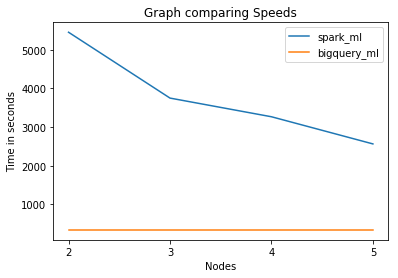

In [3]:
## The following is a plot of time vs number of nodes for linear regression performed in pyspark ml as well as bigquery ml
## For pyspark ml, the time requirements across different nodes has been shown. For bigquery ml, the yellow line is a 
## reference line for comparison.
plt.title("Graph comparing Speeds")
plt.plot([2,3,4,5], [timediff_2nodes, timediff_3nodes, timediff_4nodes, timediff_5nodes], label = "spark_ml")
plt.plot([2,3,4,5], [timediff_bqml, timediff_bqml, timediff_bqml, timediff_bqml], label = "bigquery_ml")
plt.legend(loc = "upper_right")
plt.ylabel("Time in seconds")
plt.xlabel("Nodes")
plt.xticks(range(2,6))
plt.show()

Looking at the above plot, one could infer that further increasing the number of nodes to perform pyspark ml could get the performance in terms of speed closer to BigQuery ML. However, this project is restricted to using at most 5 nodes because of google cloud permission issues.

### 7.1 SIMILARITIES

- Both models suggest a very low r sqaured value which means that most of the variance in the data is not explained by the explanatory variables. 
- The parameters in both models are the same (regularisation parameter, L2 regularisation) to achieve similar results in terms of **accuracy and prediction**. 
- Initially the size of the dataset is 40.43 GB. For simplicity's sake, I removed all null values from the interesting predictors. The size of the dataset after removing null values is 23.42 GB. More data cleaning resulted in the model being built on 5.04 GB of data which seems like a missed opportunity since so much of the data is missing. 
- Since the errors are high and the r2 values are low, linear regression does not seem to be a good model to fit on the data. Probably other machine learning techniques for regression might be more suited to predicting the trip cost in this case. As mentioned before, BigQuery ML is still in Beta phase and can only perform Linear and Logistic Regression at the moment, so for the purpose of this project, I have stuck with Linear Regression.

### 7.2 DIFFERENCES

- The speeds of both vary quite a lot. When performing machine learning in pyspark, it is possible to increase speed by increasing the number of nodes doing the computations. BigQuery is known for being lightening fast and in this case it proved that by performing the same machine learning task that took spark more than an hour at times (in case of 2 and 3 worker nodes) with the same parameters in a matter of a few minutes. 

- Pyspark ML is a lot more flexible than BigQuery ML.

- BigQuery ML seems to be more of a 'black box' than Pyspark ML when it comes to coding out the models. Not much knowledge is needed when coding the model in BigQuery. It takes time to debug and actually perform standardisation and onehotencoding of the variables in Pyspark ML whereas BigQuery does these transformations under the hood. 



### 7.3 LIMITATIONS OF EACH 
**PYSPARK ML**
- Much slower than BigQuery ML. 
- Need to manually specify that some variables need to be standardised and onehotencoded.


**BigQuery ML**
- Lightening fast results but still in Beta phase.
- Not much control because of its 'black box' nature.

After the initial enthusiasm about BigQuery ML, Google has been fairly quiet about the product and has only improved the documentation. Also, the fact that it is currently in Beta phase does not work in its favour. In order to remain competitive in today's world, technology needs to evolve fast and there were expectations that Google BigQuery ML would expand fast. Hopefully, in the near future, Google will address these issues.[3]

## 7.4 Extensions
The models compared here are the Ordinary Least Squares models. The pyspark.ml does not have gradient descent functionality so for the case of BigQuery which by default performs batch gradient descent on large datasets has explicitly been set to perform normal linear regression. Perhaps LinearRegressionwithSGD from the pyspark.mllib library could be used to speed up the performance of the model and BigQuery could perform linear regression with its default option and these two models can be compared as an extension to this project. 

In this project, pyspark.ml has been used over pyspark.mllib because [24]:
- It is newer than pyspark.mllib.
- It has the pipeline feature.
- It takes in dataframes rather than RDD's. Dataframe API's are more stable.

## 8. Final Steps
From the command line:
- Delete bucket using `gsutil rm -r gs://sunz-bucket`
- Delete cluster using `gcloud dataproc clusters delete sunz-cluster`

From the BigQuery User Interface available from the Google Cloud Console, delete the datasets under the project.

## 9. CONCLUSION

This project aims at showing how to perform machine learning on big data using two platforms and at comparing the differences between Pyspark ML and BigQuery ML. BigQuery ML is lightening fast and much easier to use than Pyspark ML. However, with great speed comes loss of flexibility and understanding. BigQuery ML is like a black box because a lot of the machine learning processes happen under the hood. The accuracies of both models are comparable as all the paramters that are fed in are similar. Pyspark ML speeds up with addition of new nodes. Even at the maximum of 5 number of nodes used to perform Pyspark ML, it is much slower than BigQuery ML. 

The Linear Regression model is used in this project. The model evaluators such as the R2 score (low) and Mean Squared Errors (high) indicate a poor model. Since BigQuery ML is in its nascent stage and only supports Linear and Logsitic Regression at this stage, linear regression has been used. More sophisticated regression models for example, ensemble methods like random forests might be better algorithms to use for this dataset.

One of the biggest gifts to analysts from Google, BigQuery ML has opened the world of machine learning to people who are not data scientists but have a fair knowledge of SQL. When BigQuery ML is released with full blown capabilities, it could replace a lot of the older machine learning platforms for big data due to its lightening fast speed. However, BigQuery ML is relatively expensive. One should weigh the costs of BigQuery ML, speed and flexibility requirements of their specific projects before deciding what platform to perform machine learning in. 

# 10. REFERENCES

[1] "What is BigQuery?", Google BigQuery Documentation, available at https://cloud.google.com/bigquery/what-is-bigquery

[2] "An Inside Look at Google BigQuery", Google paper, available at https://cloud.google.com/files/BigQueryTechnicalWP.pdf

[3] Holak, Brian. "Google's BigQuery ML needs big changes to compete", 08 April 2019, Blog Post, available at https://searchbusinessanalytics.techtarget.com/news/252461317/Googles-BigQuery-ML-needs-big-changes-to-compete

[4] Newcomer, Eric. "Uber Starts Charging What It Thinks You’re Willing to Pay", 19 May 2017, Blog Post, available at https://www.bloomberg.com/news/articles/2017-05-19/uber-s-future-may-rely-on-predicting-how-much-you-re-willing-to-pay

[5] "Use the BigQuery connector with Spark", Google Cloud Dataproc Documentation, available at https://cloud.google.com/dataproc/docs/tutorials/bigquery-connector-spark-example

[6] "Use Cloud Dataproc, BigQuery, and Apache Spark ML for Machine Learning ", Google Cloud Dataproc Documentation, available at https://cloud.google.com/dataproc/docs/tutorials/bigquery-sparkml

[7] "Community Areas in Chicago", Wikipedia, The free Encyclopedia page, available at https://en.wikipedia.org/wiki/Community_areas_in_Chicago

[8] Insight. "Spark Pipelines: Elegant Yet Powerful", 22 March 2016, Blog Post, available at https://blog.insightdatascience.com/spark-pipelines-elegant-yet-powerful-7be93afcdd42

[9] Introduction to Pyspark, Chapter 3, Getting started with Machine Learning Pipelines, Datacamp Course, available at https://campus.datacamp.com/courses/introduction-to-pyspark/getting-started-with-machine-learning-pipelines?ex=1

[10] Radescu, George S. "Machine Learning with PySpark - Feature Selection using PCC", 21 February 2018, Blog Post, available at https://blog.epigno.systems/2018/02/21/machine-learning-with-pyspark-feature-selection/

[11] "Linear Regression", Wikipedia, The free Encyclopedia page, available at https://en.wikipedia.org/wiki/Linear_regression

[12] Radescu, George S. "Machine Learning with PySpark - Linear Regression", 18 February 2018, Blog Post, available at https://blog.epigno.systems/2018/02/18/machine-learning-with-pyspark-linear-regression/

[13] "Spark MLlib Linear Regression Example", Instaclustr Documentation, available at https://www.instaclustr.com/support/documentation/apache-spark/spark-mllib-linear-regression-example/

[14] Blog editor, Minitab. "When Is It Crucial to Standardize the Variables in a Regression Model?", Blog Post, 10 February 2016, available at https://blog.minitab.com/blog/adventures-in-statistics-2/when-is-it-crucial-to-standardize-the-variables-in-a-regression-model

[15] Menon, Unnikrishnan. 19 January 2019, answer on the question "What is one-hot encoding and when is it used in data science?", Quora, 18 April 2015, available at  https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science

[16] McDonald, Carol. "Fast data processing pipeline for predicting flight delays using Apache APIs: Kafka, Spark Streaming and Machine Learning (part 1)", Blog Post, available at https://mapr.com/blog/fast-data-processing-pipeline-predicting-flight-delays-using-apache-apis-pt-1/

[17] "Scaling clusters", Google Cloud Dataproc Documentation, available at https://cloud.google.com/dataproc/docs/concepts/configuring-clusters/scaling-clusters

[18] "Use the BigQuery connector with Spark/ Reading and Writing Data From BigQuery", Google Cloud Dataproc Documentation, available at https://cloud.google.com/dataproc/docs/tutorials/bigquery-connector-spark-example#reading_and_writing_data_from_bigquery

[19] "Loading JSON data from Cloud Storage", Google BigQuery Documentation, available at https://cloud.google.com/bigquery/docs/loading-data-cloud-storage-json#bigquery_load_table_gcs_json_autodetect-python

[20] "Getting started with BigQuery ML for data scientists", Google BigQuery Documentation, available at https://cloud.google.com/bigquery/docs/bigqueryml-scientist-start

[21] "Using BigQuery ML to predict birth weight", Google BigQuery Documentation, available at https://cloud.google.com/bigquery/docs/bigqueryml-natality

[22] "The CREATE MODEL Statement", Google BigQuery Documentation, available at https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-create

[23] "Pyplot tutorial", Matplotlib, available at https://matplotlib.org/users/pyplot_tutorial.html

[24] Yuqli. "Pyspark ML vs MLLib", 21 December 2017, Blog Post, available at http://yuqli.com/?p=2330

[25] "chicago_taxi_trips", Google BigQuery Dataset, available at  https://console.cloud.google.com/bigquery?_ga=2.237940288.-1586404566.1547810022&project=sunayani&folder&organizationId&p=bigquery-public-data&d=chicago_taxi_trips&t=taxi_trips&page=table